## Student Performance Indicator 

1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

  The data consists of 8 column and 1000 rows.

3) Dataset Information
.gender : sex of students -> (Male/female)

.race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

.parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's           degree,high school)

.lunch : having lunch before test (standard or free/reduced)

.test preparation course : complete or not complete before test

.math score

.reading score

.writing score


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the dataset

df=pd.read_csv('exams.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,some high school,free/reduced,completed,45,38,37
1,female,group A,some college,standard,none,68,77,77
2,female,group C,some high school,free/reduced,completed,63,65,62
3,female,group B,high school,standard,none,67,68,66
4,female,group D,associate's degree,standard,completed,94,100,100


In [3]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
df.shape

(1000, 8)

In [5]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817771,0.809769
reading score,0.817771,1.000000,0.955600
writing score,0.809769,0.955600,1.000000


## Data Checks to Perform

. Check Missing Value
. Check Duplicate 
. Check Datatype
. Check the number of unique values of each column
. Check statistics of data
. Check various categories present in diffrent categorical column 

In [6]:
# check missing value

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Observation --> there is no null value

In [7]:
# check duplicate 

df.duplicated().sum()

1

In [8]:
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
804,male,group B,high school,standard,none,70,63,58


## Observation--> There is one duplicate value

In [9]:
## removing duplicate value

df.drop_duplicates(inplace=True)


In [10]:
df.duplicated().sum()

0

Duplicate value removed

In [11]:
# Check Datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       999 non-null    object
 1   race/ethnicity               999 non-null    object
 2   parental level of education  999 non-null    object
 3   lunch                        999 non-null    object
 4   test preparation course      999 non-null    object
 5   math score                   999 non-null    int64 
 6   reading score                999 non-null    int64 
 7   writing score                999 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.2+ KB


Observation --> 5 categorical features , 3 numerical features

In [12]:
## Checking the number of unique values of each column 

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     75
reading score                  71
writing score                  74
dtype: int64

In [13]:
## Check the statistics of the dataset

df.describe()

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,65.908909,69.018018,67.950951
std,15.324699,14.472892,15.010704
min,15.000000,25.000000,22.000000
25%,56.000000,60.000000,58.000000
50%,67.000000,70.000000,68.000000
75%,76.500000,79.000000,79.000000
max,100.000000,100.000000,100.000000


## Observation

.In the above dataset means are very close to each other lying between 65.9 to 69.01
.Standard deviation is between 14.4 to 15.3
.There is minimum of 15 for maths, 25 for reading and 22 for writing 

In [14]:
## Explore more info about data

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,some high school,free/reduced,completed,45,38,37
1,female,group A,some college,standard,none,68,77,77
2,female,group C,some high school,free/reduced,completed,63,65,62
3,female,group B,high school,standard,none,67,68,66
4,female,group D,associate's degree,standard,completed,94,100,100


In [15]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group A,master's degree,standard,none,63,72,73
996,male,group A,associate's degree,free/reduced,none,70,73,69
997,female,group C,associate's degree,standard,none,80,99,91
998,male,group E,master's degree,standard,none,92,82,81
999,male,group D,bachelor's degree,standard,completed,86,80,90


In [20]:
[ feature for feature in df.columns if df[feature].dtype!='O' ]

['math score', 'reading score', 'writing score']

In [21]:
## Segrregate categorical and numerical features 

numerical_features= [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features= [feature for feature in df.columns if df[feature].dtype=='O']



In [22]:
numerical_features

['math score', 'reading score', 'writing score']

In [23]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [24]:
df['gender'].value_counts()

female    511
male      488
Name: gender, dtype: int64

In [25]:
df['race/ethnicity'].value_counts()

group C    302
group D    263
group B    215
group E    138
group A     81
Name: race/ethnicity, dtype: int64

In [26]:
df['parental level of education'].value_counts()

some college          225
associate's degree    207
high school           200
some high school      180
bachelor's degree     120
master's degree        67
Name: parental level of education, dtype: int64

In [27]:
df['test preparation course'].value_counts()

none         658
completed    341
Name: test preparation course, dtype: int64

In [31]:
## Aggregate the total score with mean

df['total_score']=(df['math score']+ df['reading score']+ df['writing score'])
df['average_score']= df['total_score']/3
df.head()



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,male,group E,some high school,free/reduced,completed,45,38,37,120,40.000000
1,female,group A,some college,standard,none,68,77,77,222,74.000000
2,female,group C,some high school,free/reduced,completed,63,65,62,190,63.333333
3,female,group B,high school,standard,none,67,68,66,201,67.000000
4,female,group D,associate's degree,standard,completed,94,100,100,294,98.000000


<AxesSubplot: xlabel='average_score', ylabel='Count'>

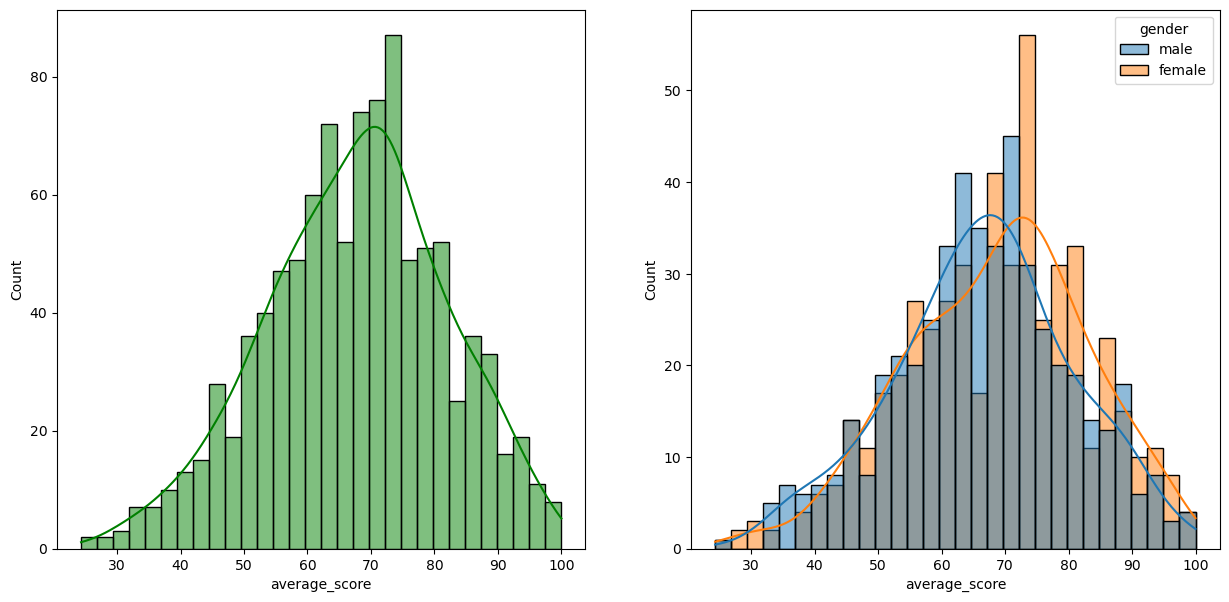

In [35]:
## Exploring more visualization

fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score', bins=30, kde= 'True', color='g')
plt.subplot(122)
sns.histplot(data=df, x='average_score', bins=30, kde= 'True', hue='gender' )


## Insight

Female students tends to score more than male students

<AxesSubplot: xlabel='average_score', ylabel='Count'>

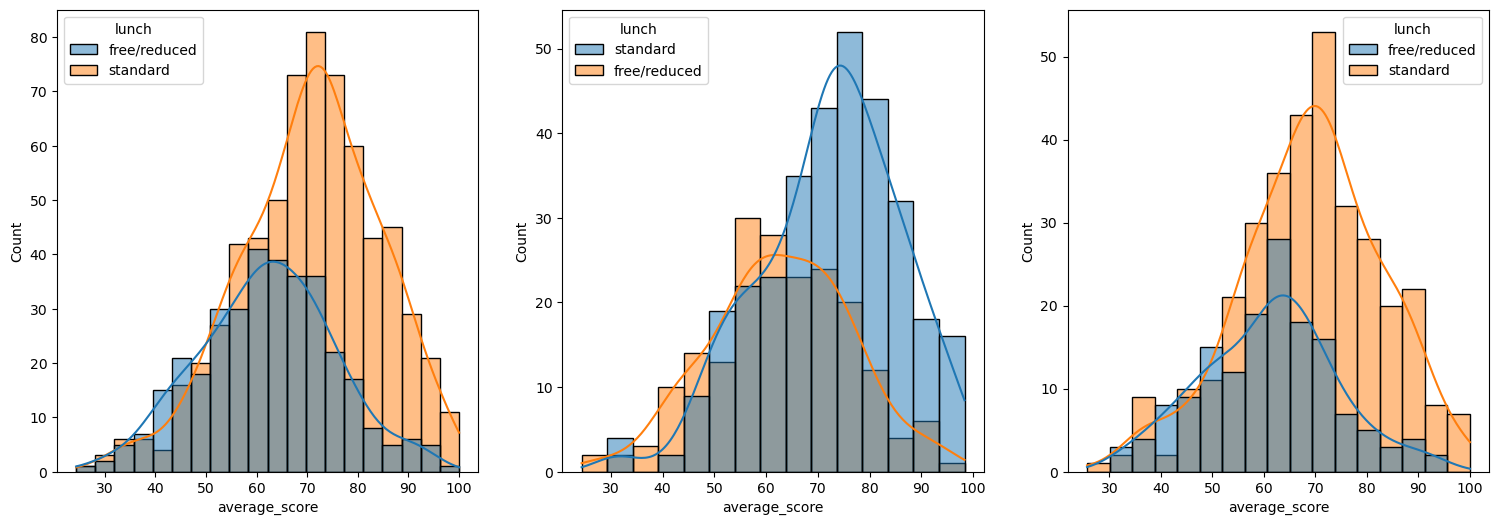

In [44]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde= True, hue='lunch')
plt.subplot(142)
sns.histplot(data= df[df.gender=='female'], x='average_score', kde= True, hue='lunch')
plt.subplot(143)
sns.histplot(data= df[df.gender=='male'], x='average_score', kde= True, hue='lunch')

## Insight 

Standard lunch helps students perform well in exam depite of their gender

In [45]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,male,group E,some high school,free/reduced,completed,45,38,37,120,40.000000
1,female,group A,some college,standard,none,68,77,77,222,74.000000
2,female,group C,some high school,free/reduced,completed,63,65,62,190,63.333333
3,female,group B,high school,standard,none,67,68,66,201,67.000000
4,female,group D,associate's degree,standard,completed,94,100,100,294,98.000000


<AxesSubplot: xlabel='average_score', ylabel='Count'>

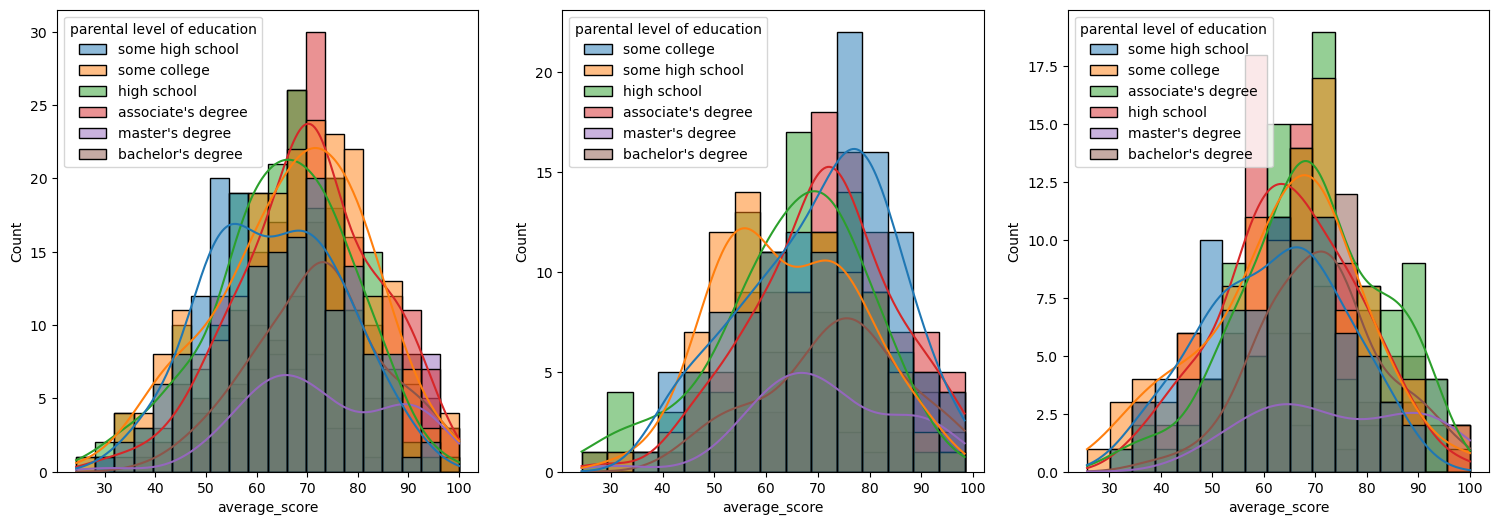

In [46]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde= True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data= df[df.gender=='female'], x='average_score', kde= True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data= df[df.gender=='male'], x='average_score', kde= True, hue='parental level of education')

## Insight 

In general parent's education level does not help studnets to perform well in exam
In second fig femlae whose parents have assocaite's degree performs best and whose parents have some high school degree perfoms worst.
In 3rd fig score is almost same irrespective of their parents degree.


<AxesSubplot: xlabel='average_score', ylabel='Count'>

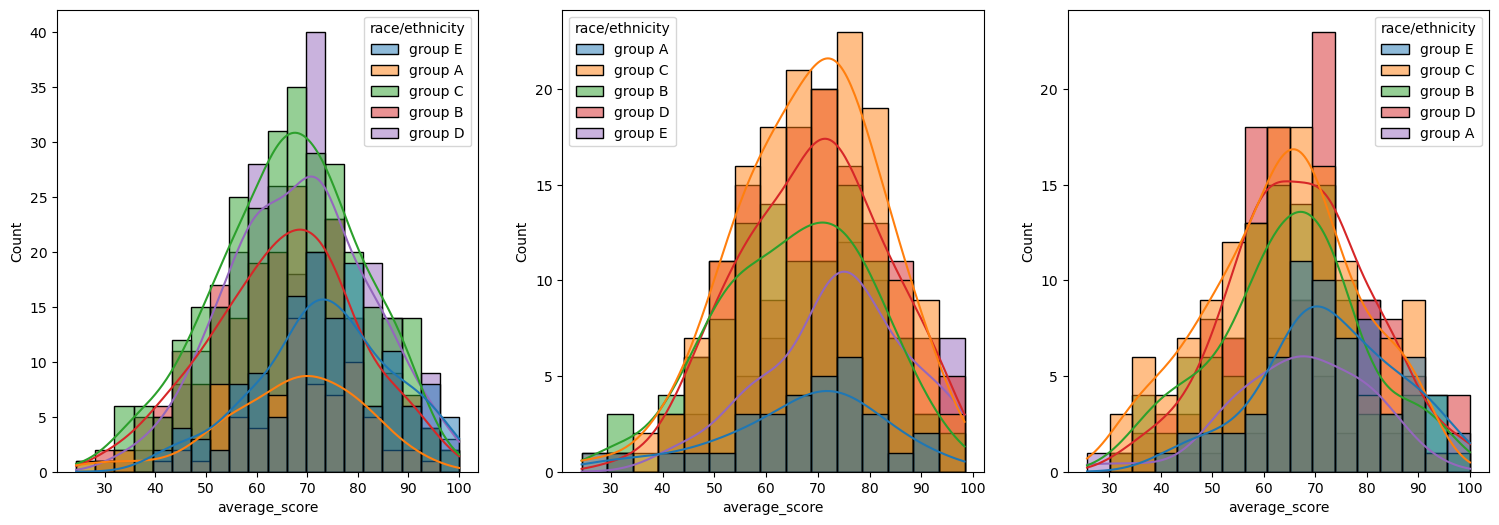

In [48]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde= True, hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data= df[df.gender=='female'], x='average_score', kde= True, hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data= df[df.gender=='male'], x='average_score', kde= True, hue='race/ethnicity')

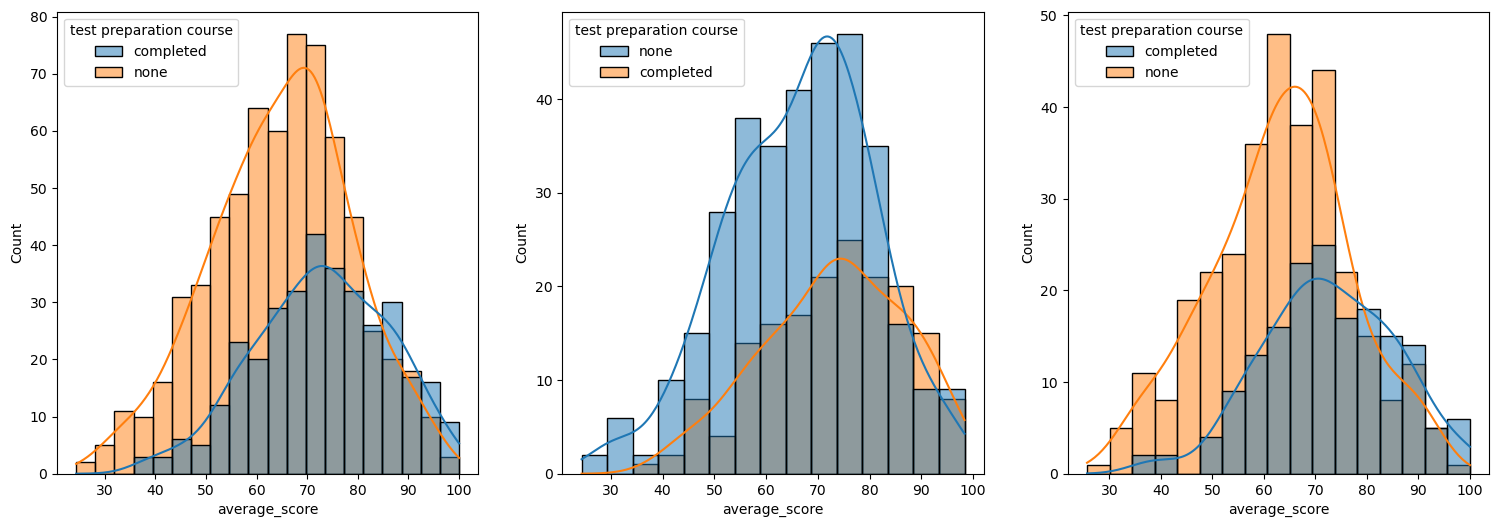

In [51]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde= True, hue='test preparation course')
plt.subplot(142)
sns.histplot(data= df[df.gender=='female'], x='average_score', kde= True, hue='test preparation course')
plt.subplot(143)
sns.histplot(data= df[df.gender=='male'], x='average_score', kde= True, hue='test preparation course')
plt.show()


## Insight 

Students who have competed the test performs well in exams.


<AxesSubplot: >

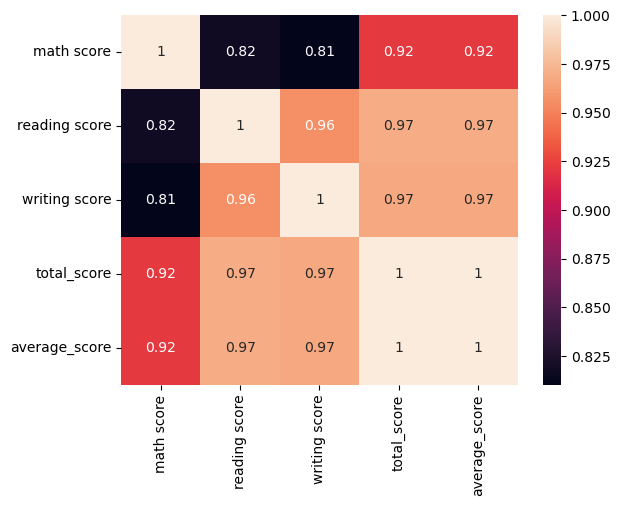

In [52]:
sns.heatmap(df.corr(), annot=True)